In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [20, 15]

In [3]:
CROP_PIXELS = 5
PADDING = 6
DISTANCE = 0.1
RATIO_HEIGHT = 0.3
RATIO_WIDTH = 1

In [4]:
image = cv2.imread('/home/trucly/Documents/DATASET/hw_collect/textlines/0002_1_uncrop.png')

image_copy = image.copy()

height, width, _ = image.shape
height, width = height - CROP_PIXELS, width - CROP_PIXELS
image = image[CROP_PIXELS: height, CROP_PIXELS: width]

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.blur(gray, (5, 5), 0)
# ret, thresh1 = cv2.threshold(gray, 135, 255, cv2.THRESH_BINARY_INV)
thresh1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)

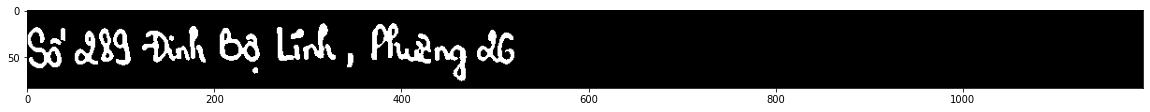

In [6]:
plt.imshow(thresh1, cmap='gray')

In [7]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

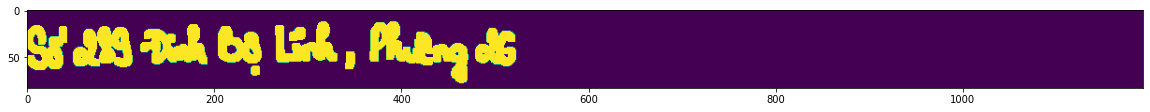

In [8]:
plt.imshow(dilation)

In [9]:
y_top, y_bottom = height, 0
x_left, x_right = width, 0

rects = []

for contour in contours:
    rects.append(cv2.boundingRect(contour))
    
print(rects)
rects.sort(key=lambda x : x[0])
print(rects)

first = False
for rect in rects:
    x, y, w, h = rect
    # if h >= height * RATIO_HEIGHT and w <= width * RATIO_WIDTH and (x - x_right) < DISTANCE * width:
    if (x - x_right) < DISTANCE * width:
        y_top = min(y_top, y)
        y_bottom = max(y_bottom, y + h)
        x_left = min(x_left, x)
        x_right = max(x_right, x + w)
        rect = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

[(239, 59, 10, 11), (340, 44, 11, 19), (479, 19, 44, 41), (280, 18, 18, 15), (204, 17, 47, 40), (49, 17, 64, 44), (0, 16, 43, 48), (121, 15, 72, 43), (366, 12, 106, 66), (265, 12, 67, 44)]
[(0, 16, 43, 48), (49, 17, 64, 44), (121, 15, 72, 43), (204, 17, 47, 40), (239, 59, 10, 11), (265, 12, 67, 44), (280, 18, 18, 15), (340, 44, 11, 19), (366, 12, 106, 66), (479, 19, 44, 41)]


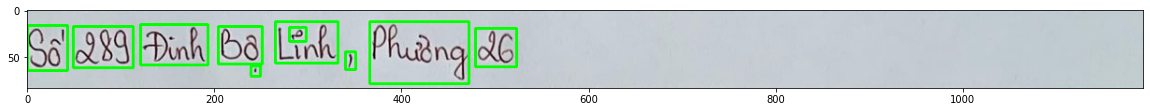

In [10]:
plt.imshow(image)

In [11]:
crop_image = image_copy[max(0, y_top - PADDING): min(y_bottom + PADDING, height),
                        max(0, x_left - PADDING): min(x_right + PADDING, width)]

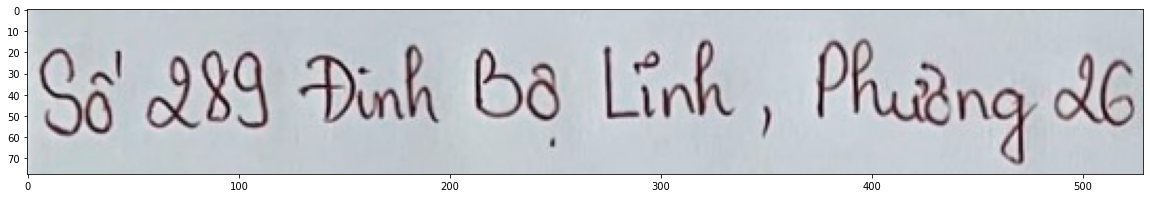

In [12]:
plt.imshow(crop_image)